<a href="https://colab.research.google.com/github/Yunke-Y/Academic_Projects/blob/main/YahooFinance%26Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
pip install yfinance

In [64]:
# Scarping Dow Jones Industrial Average(DJIA) companies data frame from wikipedia website
import requests
from bs4 import BeautifulSoup

# Scarp the DJIA companies data from Wikipedia website
URL = 'https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average'

html_content = requests.get(URL)
soup = BeautifulSoup(html_content.content, "html.parser")

soup.prettify()

# Find my table and print it
MyTable = soup.find("table", class_="wikitable sortable")

# Print MyTable to find useful data
MyTable

<table class="wikitable sortable" id="constituents">
<caption>DJIA component companies, showing trading exchange, <a href="/wiki/Ticker_symbol" title="Ticker symbol">ticker symbols</a> and industry
</caption>
<tbody><tr>
<th scope="col">Company
</th>
<th scope="col">Exchange
</th>
<th scope="col">Symbol
</th>
<th scope="col">Industry
</th>
<th scope="col">Date added
</th>
<th class="unsortable" scope="col">Notes
</th>
<th scope="col">Index weighting
</th></tr>
<tr>
<th scope="row"><a href="/wiki/3M" title="3M">3M</a>
</th>
<td><a href="/wiki/New_York_Stock_Exchange" title="New York Stock Exchange">NYSE</a>
</td>
<td><a class="external text" href="https://www.nyse.com/quote/XNYS:MMM" rel="nofollow">MMM</a>
</td>
<td><a href="/wiki/Conglomerate_(company)" title="Conglomerate (company)">Conglomerate</a>
</td>
<td>1976-08-09
</td>
<td>As Minnesota Mining and Manufacturing
</td>
<td>3.84%
</td></tr>
<tr>
<th scope="row"><a href="/wiki/American_Express" title="American Express">American Expr

In [65]:
# Create empty lists for each column data
L1 = []
L2 = []
L3 = []
L4 = []
L5 = []
L6 = []
L7 = []

# Create a list for column names
Column_Name = []

# Make a loop to record the column names of the table and save as a list
for row in MyTable.findAll("tr"):
	name = row.findAll("th")
	if len(name) == 7:
		Column_Name.append(name[0].find(text=True).rstrip("\n"))
		Column_Name.append(name[1].find(text=True).rstrip("\n"))
		Column_Name.append(name[2].find(text=True).rstrip("\n"))
		Column_Name.append(name[3].find(text=True).rstrip("\n"))
		Column_Name.append(name[4].find(text=True).rstrip("\n"))
		Column_Name.append(name[5].find(text=True).rstrip("\n"))
		Column_Name.append(name[6].find(text=True).rstrip("\n"))

# Make a loop to record the company name data for each row
for row in MyTable.findAll("tr"):
	cells = row.findAll("th")
	if len(cells) == 1:
		L1.append(cells[0].find(text=True).rstrip("\n"))

# Make a loop to record the rest data of the table for each cell
for row in MyTable.findAll("tr"):
	cells = row.findAll("td")
	if len(cells) == 6:
		L2.append(cells[0].find(text=True).rstrip("\n"))
		L3.append(cells[1].find(text=True).rstrip("\n"))
		L4.append(cells[2].find(text=True).rstrip("\n"))
		L5.append(cells[3].find(text=True).rstrip("\n"))
		L6.append(cells[4].find(text=True).rstrip("\n"))
		L7.append(cells[5].find(text=True).rstrip("\n"))

# Since L7 list's data are percentage convert % to float 
# Create a funtion to convert % in to float and make a new numeric list
def decimal(list):
  L = []
  for x in list:
    L.append(float(x.strip('%'))/100)
  return L

# convert L7 list from % to float  
L7 = decimal(L7)


# Combine these lists as a new table by using Pandas 
import pandas as pd
DF1 = pd.DataFrame()

# Use Column_Name list to name each column
DF1[Column_Name[0]] = L1
DF1[Column_Name[1]] = L2
DF1[Column_Name[2]] = L3
DF1[Column_Name[3]] = L4
DF1[Column_Name[4]] = L5
DF1[Column_Name[5]] = L6
DF1[Column_Name[6]] = L7

# Print the data frame
DF1

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,0.0384
1,American Express,NYSE,AXP,Financial services,1982-08-30,,0.0288
2,Amgen,NASDAQ,AMGN,Pharmaceutical industry,2020-08-31,,0.0487
3,Apple Inc.,NASDAQ,AAPL,Information technology,2015-03-19,,0.0257
4,Boeing,NYSE,BA,Aerospace,1987-03-12,,0.0492
5,Caterpillar Inc.,NYSE,CAT,Construction,1991-05-06,,0.0454
6,Chevron Corporation,NYSE,CVX,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,0.0203
7,Cisco Systems,NASDAQ,CSCO,Information technology,2009-06-08,,0.0100
8,The Coca-Cola Company,NYSE,KO,Food industry,1987-03-12,Also 1932-05-26 to 1935-11-20,0.0104
9,Dow Inc.,NYSE,DOW,Chemical industry,2019-04-02,,0.0125


In [66]:
# Prepare empty lists for each required column data
Open_Price = []
Bid_Price= []
FiftyTwoWeek_High = []
FiftyTwoWeek_Low = []
Beta = []
PEG_Ratio = []

# Make a function to record each company's info by using 'Symbol' and return as an new data frame
def GetInfo(List):
  # For every element in the list, do Yahoo Finance API request 
  for x in List:
    # Select need data and add it into the speicific list
    x = yf.Ticker(x)
    Open_Price.append(x.info['open'])
    Bid_Price.append(x.info['bid'])
    FiftyTwoWeek_High.append(x.info['fiftyTwoWeekHigh'])
    FiftyTwoWeek_Low.append(x.info['fiftyTwoWeekLow'])
    Beta.append(x.info['beta'])
    PEG_Ratio.append(x.info['pegRatio'])
    
    # Create a new data frame df, and save these data
    df = pd.DataFrame()
    # Name these columns
    df['Open Price($)'] = Open_Price
    df['Bid Price($)'] = Bid_Price
    df['52-Week high($)'] = FiftyTwoWeek_High
    df['52-Week low($)'] = FiftyTwoWeek_Low
    df['Beta'] = Beta
    df['PEG Ratio'] = PEG_Ratio
    
  # finally, return the data frame with all need data inside
  return df

# Select 'Symbol' column data from DF1 and make them as a list
Symbol_List = list(DF1['Symbol'])

# Use the symbol list to call above function and get an new data frame, name it 'DF2'
DF2 = GetInfo(Symbol_List)

# Print this second data frame, this dataframe does not contain symbol inside
DF2

,Open Price($),Bid Price($),52-Week high($),52-Week low($),Beta,PEG Ratio
0,204.000,204.55,208.9500,142.51,0.956149,2.58
1,155.390,157.20,160.6900,85.92,1.291978,0.92
2,252.890,250.09,276.6900,210.28,0.712299,2.47
3,126.250,127.60,145.0900,77.58,1.203743,1.45
4,225.990,228.60,278.5700,125.80,1.631550,-15.30
5,242.000,242.40,245.7800,111.47,0.919251,1.24
6,107.800,109.55,113.1100,65.16,1.299465,-3.87
7,52.930,52.96,54.1400,35.28,0.900534,2.82
8,54.900,54.73,55.5000,43.51,0.616042,2.72
9,68.750,67.56,69.1000,29.62,1.799008,-1.96


In [67]:
# Merge the two data frames horizontally (side by side) into a third data frame: DF3
DF3 = pd.concat([DF1,DF2], axis = 1)

# Print the combined data frame
DF3

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting,Open Price($),Bid Price($),52-Week high($),52-Week low($),Beta,PEG Ratio
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,0.0384,204.000,204.55,208.9500,142.51,0.956149,2.58
1,American Express,NYSE,AXP,Financial services,1982-08-30,,0.0288,155.390,157.20,160.6900,85.92,1.291978,0.92
2,Amgen,NASDAQ,AMGN,Pharmaceutical industry,2020-08-31,,0.0487,252.890,250.09,276.6900,210.28,0.712299,2.47
3,Apple Inc.,NASDAQ,AAPL,Information technology,2015-03-19,,0.0257,126.250,127.60,145.0900,77.58,1.203743,1.45
4,Boeing,NYSE,BA,Aerospace,1987-03-12,,0.0492,225.990,228.60,278.5700,125.80,1.631550,-15.30
5,Caterpillar Inc.,NYSE,CAT,Construction,1991-05-06,,0.0454,242.000,242.40,245.7800,111.47,0.919251,1.24
6,Chevron Corporation,NYSE,CVX,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,0.0203,107.800,109.55,113.1100,65.16,1.299465,-3.87
7,Cisco Systems,NASDAQ,CSCO,Information technology,2009-06-08,,0.0100,52.930,52.96,54.1400,35.28,0.900534,2.82
8,The Coca-Cola Company,NYSE,KO,Food industry,1987-03-12,Also 1932-05-26 to 1935-11-20,0.0104,54.900,54.73,55.5000,43.51,0.616042,2.72
9,Dow Inc.,NYSE,DOW,Chemical industry,2019-04-02,,0.0125,68.750,67.56,69.1000,29.62,1.799008,-1.96


In [68]:
# Print all companies with PEG ratio less than 1 and PEG ratio is greater than 0
DF3[(DF3['PEG Ratio'] <= 1) & (DF3['PEG Ratio'] > 0)]

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting,Open Price($),Bid Price($),52-Week high($),52-Week low($),Beta,PEG Ratio
1,American Express,NYSE,AXP,Financial services,1982-08-30,,0.0288,155.39,157.2,160.690,85.92,1.291978,0.92
10,Goldman Sachs,NYSE,GS,Financial services,2013-09-20,,0.0654,363.07,369.0,366.785,162.45,1.497517,0.46


In [69]:
# Select the highest 10 Beta value companies
# sort the dataframe with 'Beta' column with descending, then the top 10 will be the highest 10 Beta value companies
# save these 10 companies as an new data frame Top_Beta
Top_Beta = DF3.sort_values(by='Beta', ascending= False).head(10)
Top_Beta

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting,Open Price($),Bid Price($),52-Week high($),52-Week low($),Beta,PEG Ratio
9,Dow Inc.,NYSE,DOW,Chemical industry,2019-04-02,,0.0125,68.75,67.56,69.100,29.62,1.799008,-1.96
4,Boeing,NYSE,BA,Aerospace,1987-03-12,,0.0492,225.99,228.60,278.570,125.80,1.631550,-15.30
10,Goldman Sachs,NYSE,GS,Financial services,2013-09-20,,0.0654,363.07,369.00,366.785,162.45,1.497517,0.46
6,Chevron Corporation,NYSE,CVX,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,0.0203,107.80,109.55,113.110,65.16,1.299465,-3.87
1,American Express,NYSE,AXP,Financial services,1982-08-30,,0.0288,155.39,157.20,160.690,85.92,1.291978,0.92
13,IBM,NYSE,IBM,Information technology,1979-06-29,Also 1932-05-26 to 1939-03-04,0.0259,143.84,144.76,144.150,105.92,1.225041,2.32
16,JPMorgan Chase,NYSE,JPM,Financial services,1991-05-06,,0.0295,159.61,164.20,161.690,82.40,1.211252,8.96
29,The Walt Disney Company,NYSE,DIS,Broadcasting,1991-05-06,,0.0366,180.70,174.20,203.020,98.65,1.208494,1.93
3,Apple Inc.,NASDAQ,AAPL,Information technology,2015-03-19,,0.0257,126.25,127.60,145.090,77.58,1.203743,1.45
12,Honeywell,NASDAQ,HON,Conglomerate,2020-08-31,,0.0447,226.64,227.36,227.260,117.11,1.189189,2.29


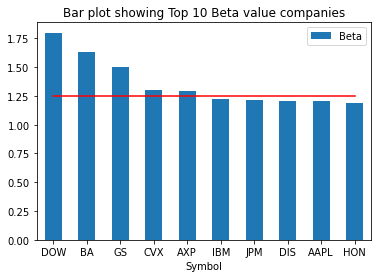

In [70]:
# import matplotlib library
from matplotlib import pyplot as plt

# Plot Top_Beta in a bar chart, with x-axis is Symbol name, y-axis is the Beta value
Top_Beta.plot(x='Symbol', y="Beta", 
	title = 'Bar plot showing Top 10 Beta value companies', 
	kind = 'bar', rot = 0)

# Add a horizontal line in this chart to clearify the Beta value level
# Since the the 5th company's beta is greater than 1.25 but the 6th is less than 1.25, so y=1.25 is the suitable horizontal line
plt.plot([0,9], [1.25, 1.25], color = 'red')

In [71]:
# Print the description statistics for the combined data frame
DF3[['Index weighting','Open Price($)','Bid Price($)','52-Week high($)','52-Week low($)','Beta','PEG Ratio']].describe()

,Index weighting,Open Price($),Bid Price($),52-Week high($),52-Week low($),Beta,PEG Ratio
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.033330,173.109500,173.685333,183.331553,109.914333,0.942017,1.578333
std,0.017274,92.375333,92.506160,95.103747,54.779564,0.362787,3.814658
min,0.010000,52.930000,52.960000,54.140000,29.620000,0.430226,-15.300000
25%,0.021650,112.412500,114.062500,120.870000,73.185000,0.673248,1.320000
50%,0.029900,158.635000,160.700000,161.440000,108.585000,0.909892,2.300000
75%,0.044850,226.477500,228.290000,242.727900,144.010000,1.207306,2.712500
max,0.073300,409.290000,406.050000,410.850000,246.260000,1.799008,8.960000


In [72]:
# save the DF3 data frame as a .csv file
DF3.to_csv("Stock Basic Information of DJIA 30 Companies.csv")